In [ ]:
#Importing desired files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
import warnings

from google.colab import files
uploaded = files.upload()
warnings.filterwarnings('ignore')
dataset = pd.read_csv("TESLA.csv")
dataset.head()

Saving TESLA.csv to TESLA.csv


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [ ]:
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,open-close,low-high,target
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500,1.589966,-18.729981,1
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500,-5.299988,-22.369995,1
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700,-8.390015,-32.880005,1
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300,-10.570007,-20.479980,1
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000,-106.309998,-112.619995,0


In [ ]:
dataset.describe()

,Open,High,Low,Close,Adj Close,Volume,open-close,low-high,target
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03,2416.000000,2416.000000,2416.000000
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06,-0.132504,-6.661585,0.511175
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06,5.628115,5.791300,0.499979
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05,-106.309998,-112.619995,0.000000
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06,-1.762506,-9.254997,0.000000
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06,0.015001,-5.854996,1.000000
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06,1.762508,-1.880001,1.000000
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07,28.079987,-0.250000,1.000000


In [ ]:
dataset.shape

(2416, 10)

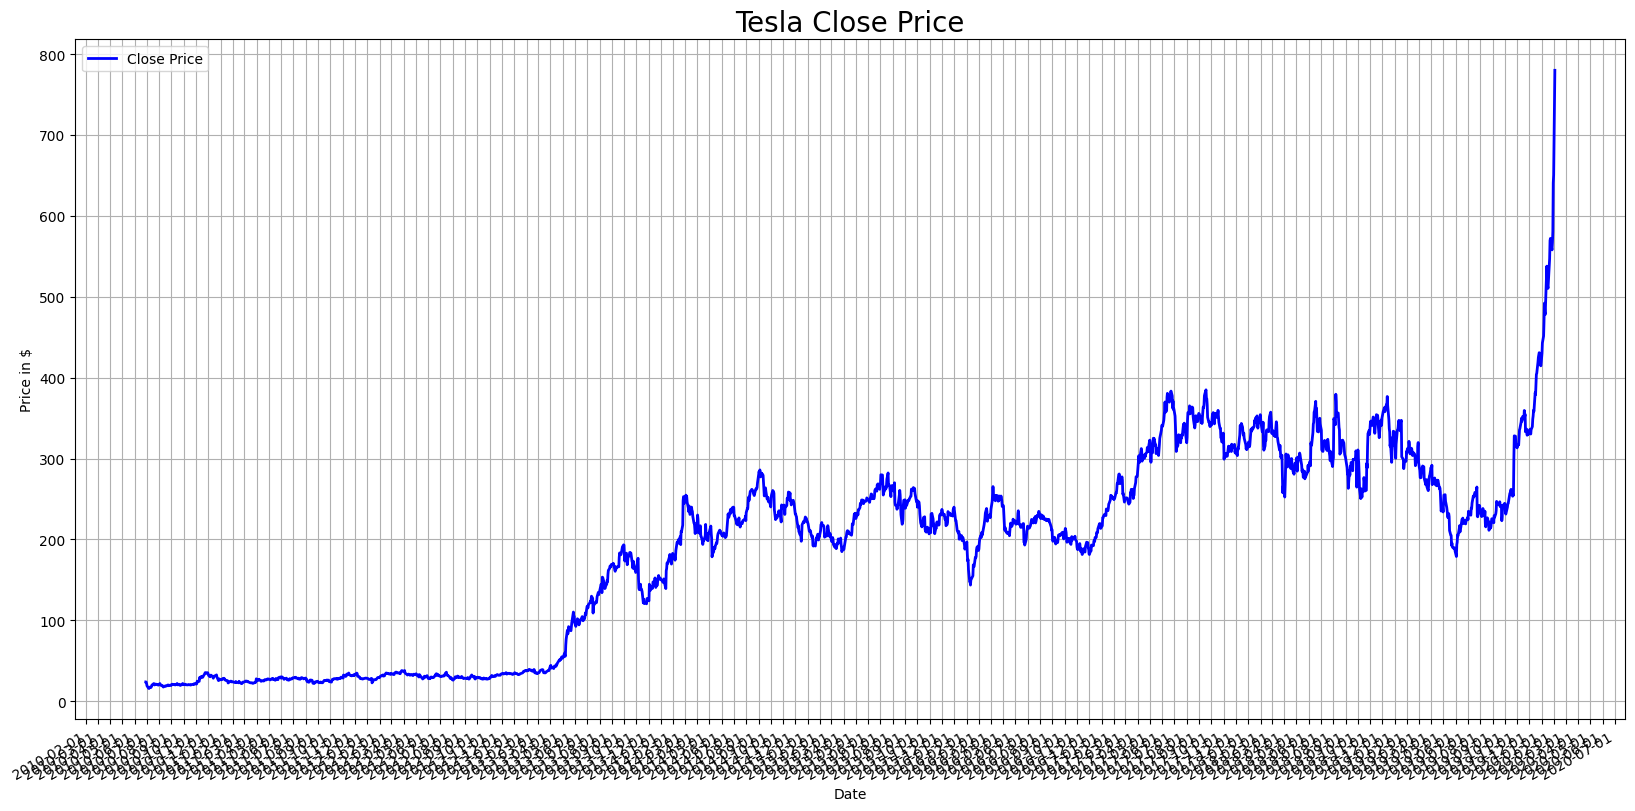

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Assuming you have loaded your dataset with a 'Date' column and a 'Close' column
# Make sure 'Date' is in datetime format

# Convert the 'Date' column to a datetime format if it's not already
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Set 'Date' as the index of the DataFrame
dataset.set_index('Date', inplace=True)

# Create a figure with custom size
plt.figure(figsize=(20, 10))

# Plot the Close Price with enhanced customization
plt.plot(dataset.index, dataset['Close'], label='Close Price', color='b', linewidth=2)

# Adding customizations to the plot
plt.title('Tesla Close Price', fontsize=20)
plt.xlabel('Date')
plt.ylabel('Price in $')
plt.grid(True)

# Formatting the x-axis to display dates nicely
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.gcf().autofmt_xdate()

# Adding a legend
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [ ]:
dataset = dataset.drop(['Adj Close'], axis=1)

In [ ]:
dataset.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
open-close    0
low-high      0
target        0
dtype: int64

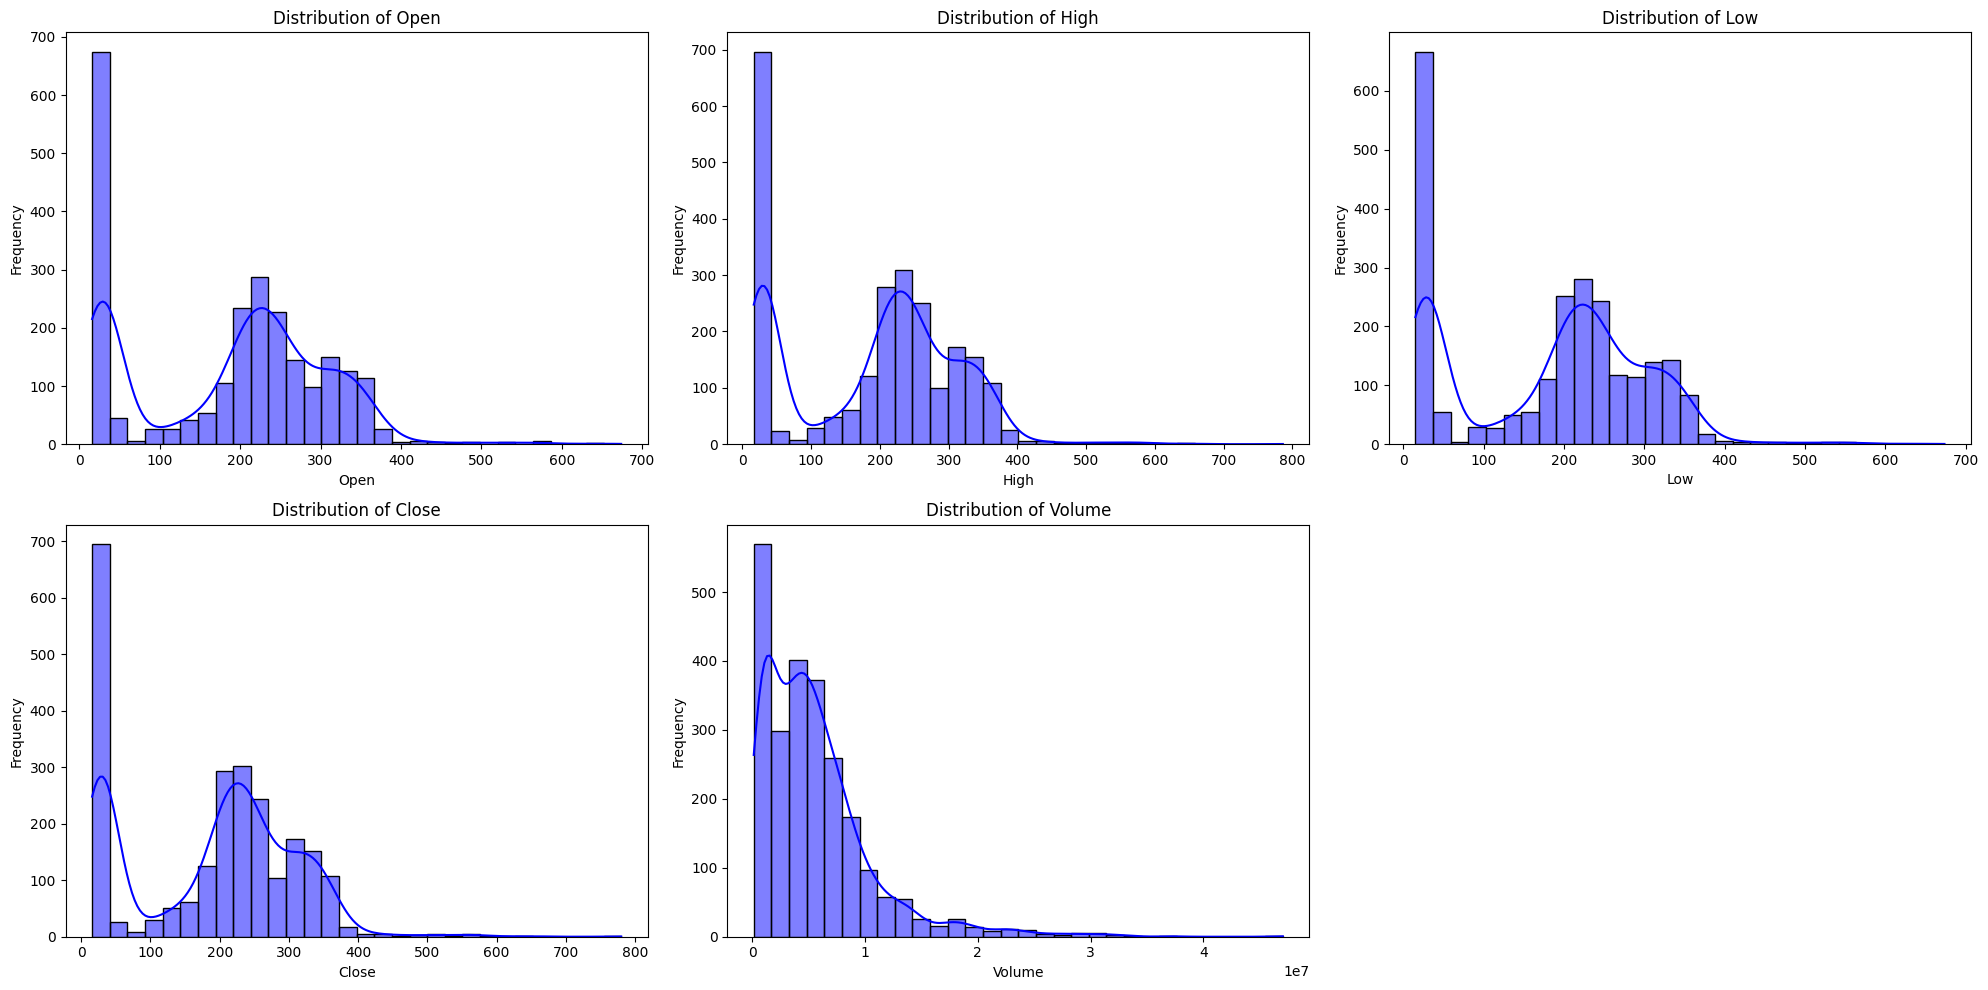

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the list of features you want to visualize
features = ['Open', 'High', 'Low', 'Close', 'Volume']

# Create subplots with customized figure size
plt.figure(figsize=(20, 10))

# Loop through each feature and create a separate subplot
for i, col in enumerate(features):
    # Create subplots in a 2x3 grid
    plt.subplot(2, 3, i + 1)

    # Use seaborn's distplot for plotting a distribution of the feature
    sns.histplot(dataset[col], kde=True, bins=30, color='blue')

    # Add title to each subplot
    plt.title(f'Distribution of {col}')

    # Add x and y axis labels
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the subplots
plt.show()


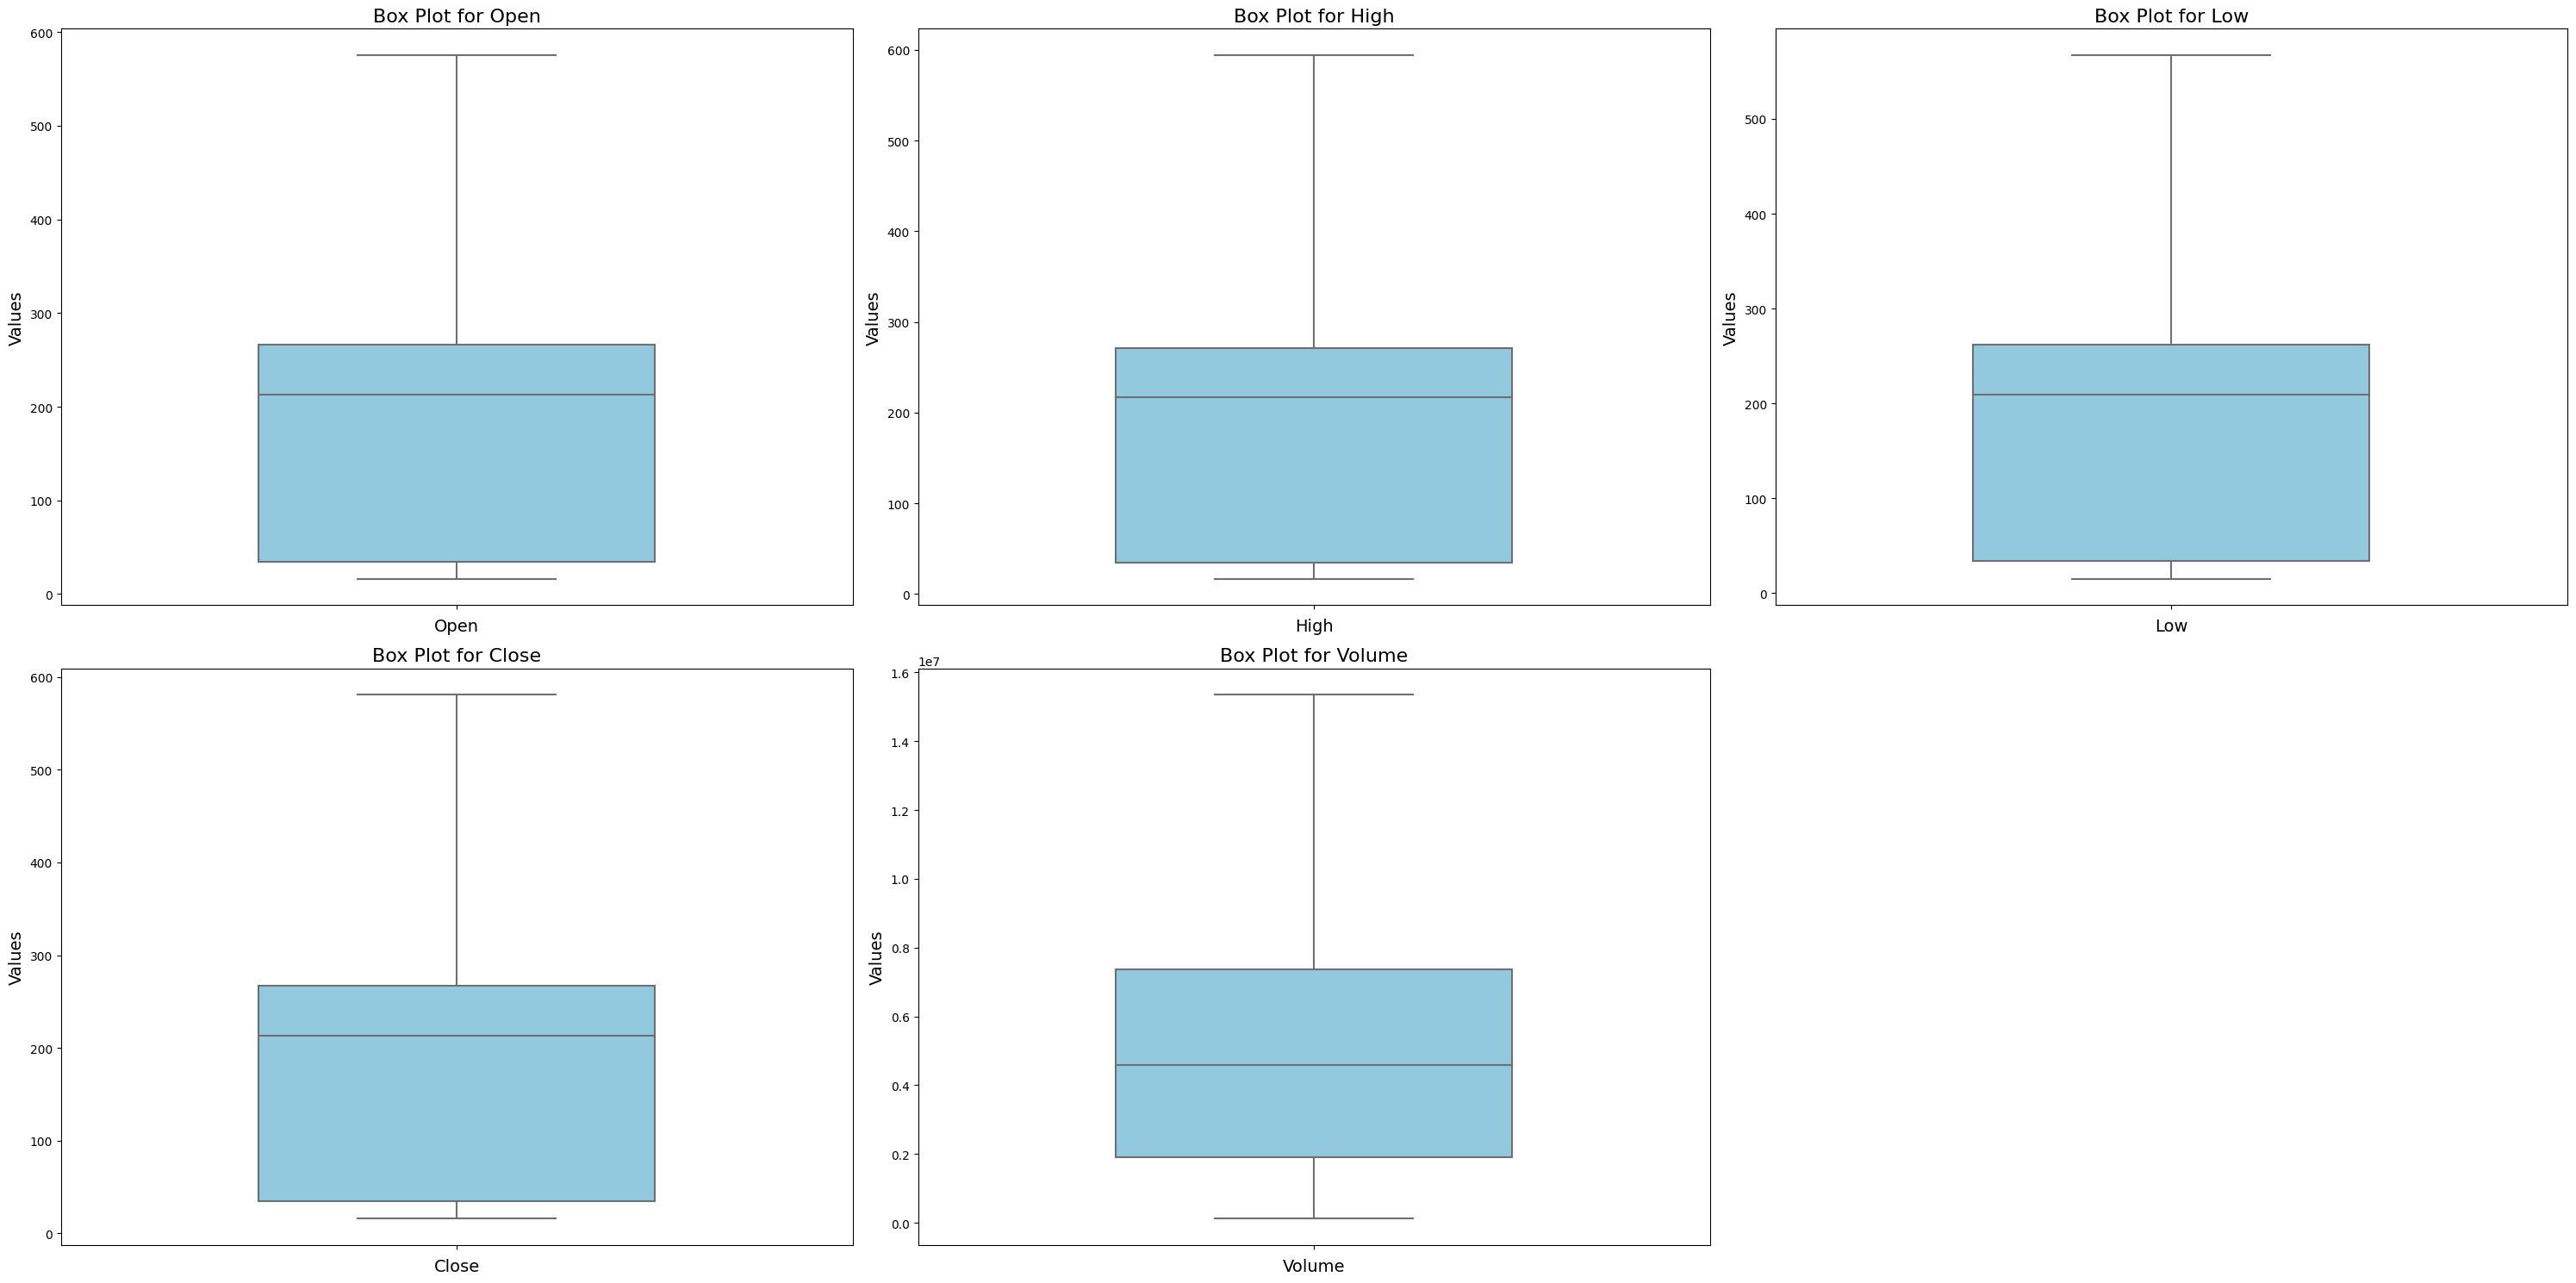

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size for the subplots
plt.subplots(figsize=(30, 15))

# Enumerate through each column (feature) in your dataset
for i, column in enumerate(features):
    # Create a subplot grid with 2 rows and 3 columns
    plt.subplot(2, 3, i + 1)

    # Create a box plot for the current feature
    sns.boxplot(data=dataset, y=column, width=0.5, color='skyblue', showfliers=False)

    # Set subplot title and labels
    plt.title(f'Box Plot for {column}', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Values', fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the subplots
plt.show()


Mean Squared Error: 37.348787385354946
R-squared: 0.9975598924892768


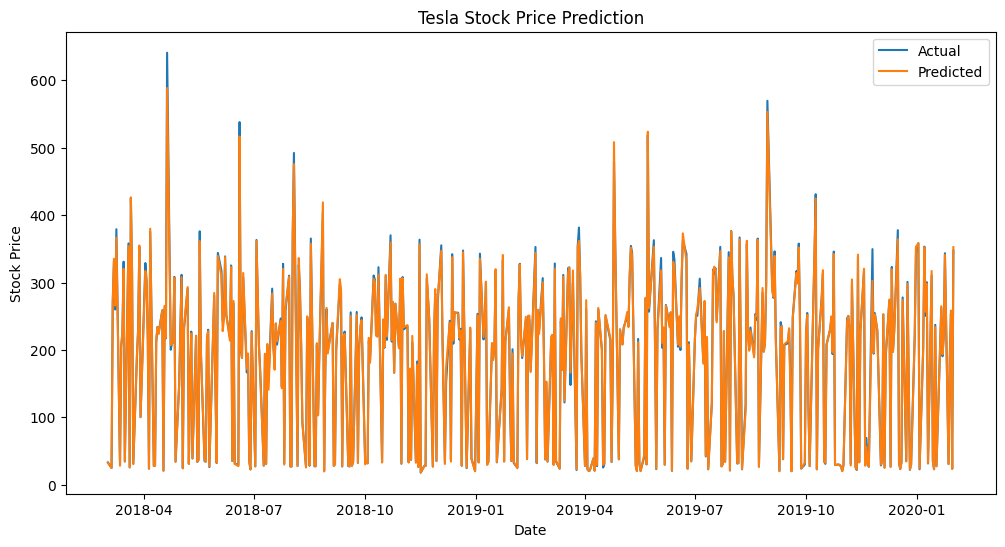

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Load your dataset, make sure 'Date' is a datetime column
# dataset = pd.read_csv("your_dataset.csv")
# dataset['Date'] = pd.to_datetime(dataset['Date'])
# dataset.set_index('Date', inplace=True)

# Feature Engineering
dataset['Year'] = dataset.index.year
dataset['Month'] = dataset.index.month
dataset['Day'] = dataset.index.day

# Create target variable (e.g., predicting 'Close' price)
target_column = 'Close'
dataset['Target'] = dataset[target_column].shift(-1)  # Shift the target by one day to create labels

# Drop rows with NaN in the 'Target' column
dataset.dropna(inplace=True)

# Split the data into train and test sets
X = dataset.drop(columns=['Target', target_column])
y = dataset['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the machine learning model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the predictions
plt.figure(figsize=(12, 6))
plt.plot(dataset.index[-len(y_test):], y_test, label="Actual")
plt.plot(dataset.index[-len(y_test):], y_pred, label="Predicted")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price Prediction")
plt.legend()
plt.show()


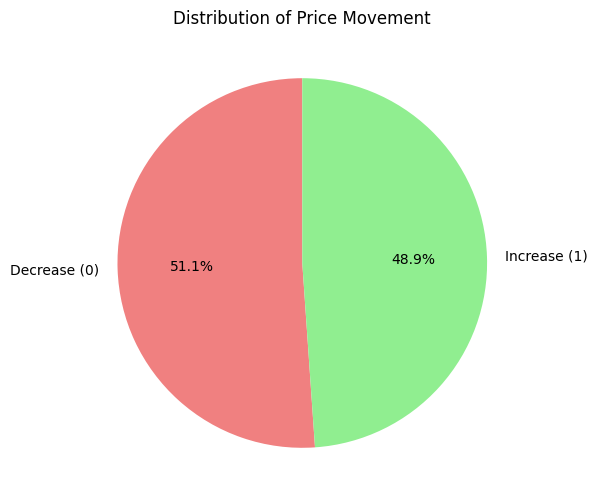

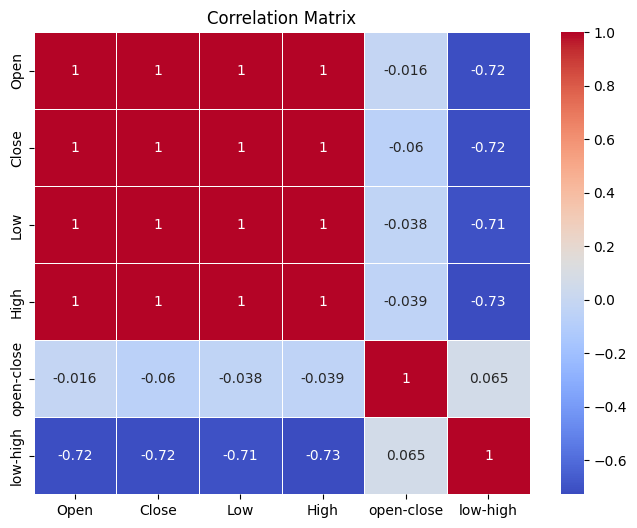

Statistical Summary of Features:
              Open        Close          Low         High   open-close  \
count  2415.000000  2415.000000  2415.000000  2415.000000  2415.000000   
mean    186.069317   186.157855   182.713491   189.331201    -0.088538   
std     118.349524   118.546390   116.454307   120.305954     5.197764   
min      16.139999    15.800000    14.980000    16.629999   -35.730011   
25%      34.334999    34.400002    33.585001    34.895001    -1.760002   
50%     212.970001   212.960007   208.820007   216.740005     0.020000   
75%     266.370011   266.724991   262.089996   270.745010     1.765005   
max     640.000000   650.570007   632.520020   653.000000    28.079987   

          low-high  
count  2415.000000  
mean     -6.617710  
std       5.375896  
min     -48.309997  
25%      -9.250000  
50%      -5.849991  
75%      -1.880001  
max      -0.250000  


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded your dataset into 'dataset'

# Calculate 'open-close' and 'low-high' features
dataset['open-close'] = dataset['Open'] - dataset['Close']
dataset['low-high'] = dataset['Low'] - dataset['High']

# Create a target variable indicating price movement (1 for increase, 0 for decrease)
dataset['target'] = np.where(dataset['Close'].shift(-1) > dataset['Close'], 1, 0)

# Plot a pie chart to visualize the distribution of the target variable
plt.figure(figsize=(6, 6))
target_counts = dataset['target'].value_counts()
labels = ['Decrease (0)', 'Increase (1)']
plt.pie(target_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.title('Distribution of Price Movement')
plt.show()

# Visualize the correlation matrix to identify relationships between features
correlation_matrix = dataset[['Open', 'Close', 'Low', 'High', 'open-close', 'low-high']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Statistical summary of the dataset
summary_stats = dataset[['Open', 'Close', 'Low', 'High', 'open-close', 'low-high']].describe()
print("Statistical Summary of Features:")
print(summary_stats)

# Advanced analysis or modeling can be performed after this preprocessing step


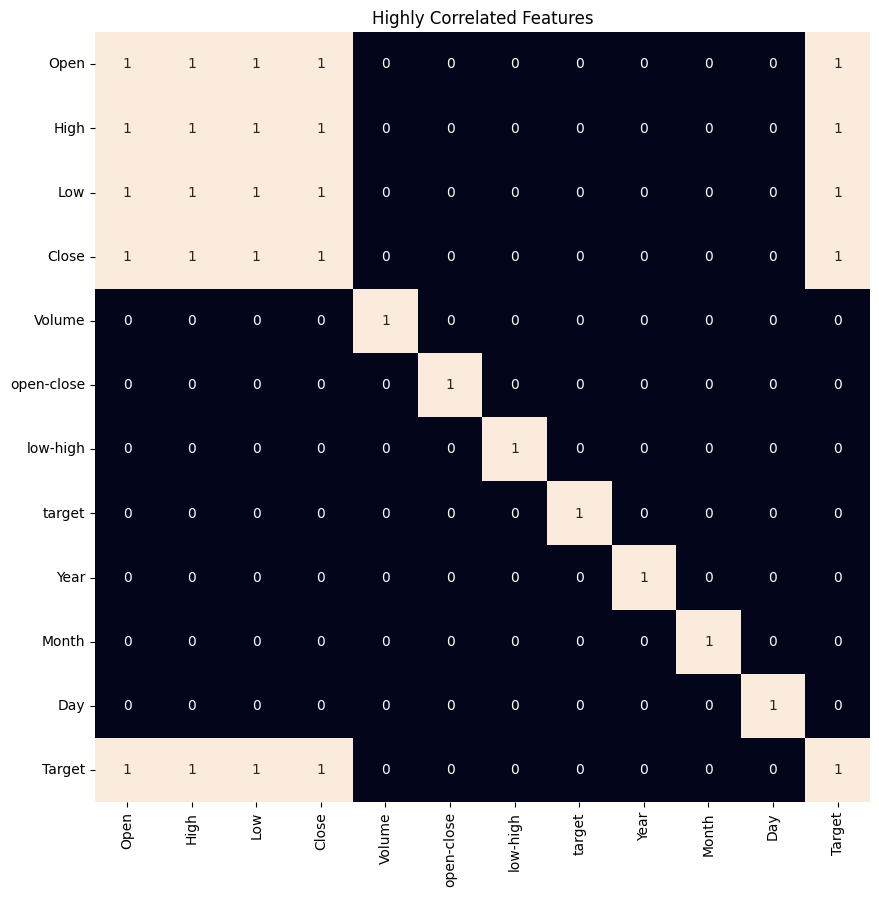

In [31]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size for the heatmap
plt.figure(figsize=(10, 10))

# Calculate the correlation matrix for the dataset
correlation_matrix = dataset.corr()

# Create a mask to highlight highly correlated features
# We set the mask to True for correlations greater than 0.9 (highly correlated)
correlation_mask = correlation_matrix > 0.9

# Create a heatmap using Seaborn
# 'annot=True' adds numeric values in each cell
# 'cbar=False' removes the color bar on the side
sns.heatmap(correlation_mask, annot=True, cbar=False)

# Set the title for the heatmap
plt.title('Highly Correlated Features')

# Show the heatmap
plt.show()


In [32]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming you have loaded your dataset into the 'dataset' DataFrame
# 'open-close' and 'low-high' are your feature columns, and 'target' is your target column

# Selecting features and target
features = dataset[['open-close', 'low-high']]
target = dataset['target']

# Standardize features using StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and validation sets (90% training, 10% validation)
X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)

# Check the shapes of the training and validation sets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_valid.shape)

# Now you have your features (X_train, X_valid) and target (Y_train, Y_valid) ready for further processing and modeling.


Training set shape: (2173, 2)
Validation set shape: (242, 2)


Evaluating Logistic Regression...
Logistic Regression Results:
Training ROC AUC Score: 0.5129
Validation ROC AUC Score: 0.4880

Evaluating SVM (Poly Kernel)...
SVM (Poly Kernel) Results:
Training ROC AUC Score: 0.5234
Validation ROC AUC Score: 0.4938

Evaluating XGBoost...
XGBoost Results:
Training ROC AUC Score: 0.9539
Validation ROC AUC Score: 0.4997



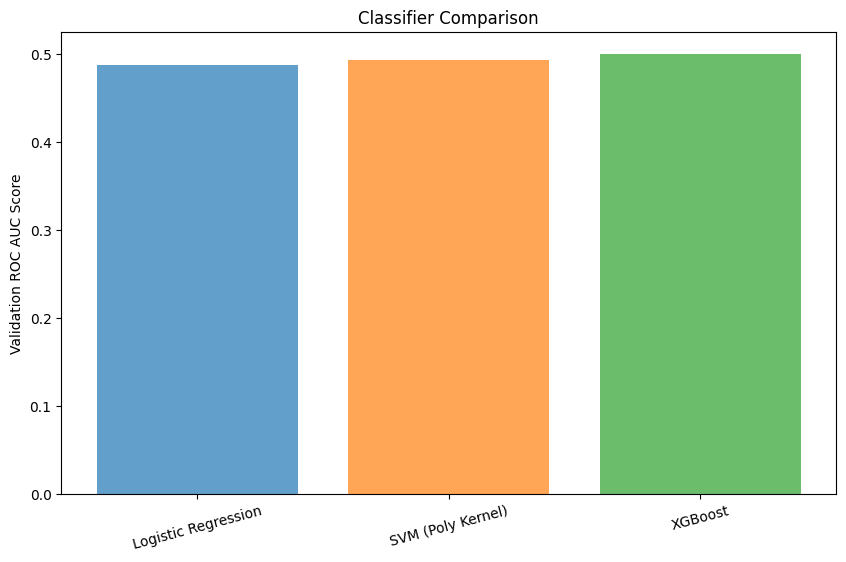

In [33]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define a list of classifiers to evaluate
classifiers = [
    ('Logistic Regression', LogisticRegression()),
    ('SVM (Poly Kernel)', SVC(kernel='poly', probability=True)),
    ('XGBoost', XGBClassifier())
]

# Initialize a dictionary to store results
results = {}

# Loop through each classifier
for name, model in classifiers:
    print(f'Evaluating {name}...')

    # Fit the model on the training data
    model.fit(X_train, Y_train)

    # Calculate ROC AUC scores on training and validation data
    train_roc_auc = roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
    valid_roc_auc = roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1])

    # Print and store the results
    print(f'{name} Results:')
    print('Training ROC AUC Score: {:.4f}'.format(train_roc_auc))
    print('Validation ROC AUC Score: {:.4f}'.format(valid_roc_auc))
    print()

    # Store the results in the dictionary
    results[name] = {
        'Training ROC AUC': train_roc_auc,
        'Validation ROC AUC': valid_roc_auc
    }

# Compare the performance of different classifiers
plt.figure(figsize=(10, 6))
for name, result in results.items():
    plt.bar(name, result['Validation ROC AUC'], alpha=0.7)

plt.ylabel('Validation ROC AUC Score')
plt.title('Classifier Comparison')
plt.xticks(rotation=15)
plt.show()



LogisticRegression() : 
Training AUC-ROC Score :  0.5129339799404828
Validation AUC-ROC Score :  0.48802681992337166

SVC(kernel='poly', probability=True) : 
Training AUC-ROC Score :  0.5233656071692001
Validation AUC-ROC Score :  0.49377394636015326

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, .

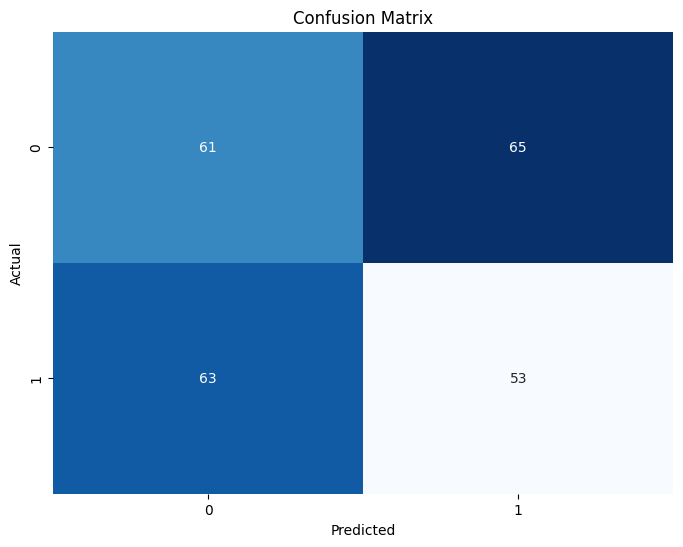

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# Define a function to train and evaluate a model
def train_and_evaluate_model(model, X_train, Y_train, X_valid, Y_valid):
    # Train the model
    model.fit(X_train, Y_train)

    # Calculate AUC-ROC scores
    train_auc_roc = roc_auc_score(Y_train, model.predict_proba(X_train)[:, 1])
    valid_auc_roc = roc_auc_score(Y_valid, model.predict_proba(X_valid)[:, 1])

    return train_auc_roc, valid_auc_roc

# Assuming you have training data X_train and labels Y_train
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

# Load and preprocess your data (X_train, Y_train, X_valid, Y_valid)

for model in models:
    # Train and evaluate each model
    train_auc_roc, valid_auc_roc = train_and_evaluate_model(model, X_train, Y_train, X_valid, Y_valid)

    # Print the results
    print(f'{model} : ')
    print('Training AUC-ROC Score : ', train_auc_roc)
    print('Validation AUC-ROC Score : ', valid_auc_roc)
    print()

# Train and evaluate a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
train_auc_roc, valid_auc_roc = train_and_evaluate_model(clf, X_train, Y_train, X_valid, Y_valid)

# Print the results
print(f'RandomForestClassifier : ')
print('Training AUC-ROC Score : ', train_auc_roc)
print('Validation AUC-ROC Score : ', valid_auc_roc)

# Generate predictions on the validation data
Y_pred = clf.predict(X_valid)

# Calculate the confusion matrix
confusion = confusion_matrix(Y_valid, Y_pred)

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [36]:
%%shell
jupyter nbconvert --to html /StocksPrediction.ipynb

[NbConvertApp] Converting notebook /StocksPrediction.ipynb to html
[NbConvertApp] Writing 1225219 bytes to /StocksPrediction.html
